### 从产销看发展

In [69]:
#1. 不同品牌、不同车厂新能源汽车产销量折线图
"""
1. 根据历年新能源汽车产销量分析2010-2021新能源汽车的发展
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sale_production_type=pd.read_excel(r'2010_\2010-2022历年汽车、乘用车、商用车产销量.xlsx',sheet_name="source",skiprows=1,nrows=14)
sale_production_type

,年份,汽车产量,汽车销量,乘用车产量,乘用车销量,商用车产量,商用车销量
0,2022,2702.10,2686.40,2383.60,2356.30,318.50,330.00
1,2021,2608.20,2627.50,2140.80,2148.20,467.40,479.30
2,2020,2522.50,2531.10,1999.40,2017.80,523.10,513.30
3,2019,2572.10,2576.90,2136.00,2144.40,436.00,432.40
4,2018,2780.92,2808.06,2352.94,2370.98,427.98,437.08
5,2017,2901.50,2887.90,2480.70,2471.80,420.90,416.10
6,2016,2811.90,2802.80,2442.10,2437.70,369.80,365.10
7,2015,2450.33,2459.76,2107.94,2114.63,342.39,345.13
8,2014,2372.29,2349.19,1991.98,1970.06,380.31,379.13
9,2013,2211.68,2198.41,1808.52,1792.89,403.16,405.52


In [70]:
new_energy = pd.read_excel(r'2010_\2010-2022新能源汽车产量、销量.xlsx',nrows=14)
new_sale = new_energy['产量'].values.tolist()
new_production = new_energy['销量'].values.tolist()
columns=sale_production_type.columns[1:]
print(columns)

Index(['汽车产量', '汽车销量', '乘用车产量', '乘用车销量', '商用车产量', '商用车销量'], dtype='object')


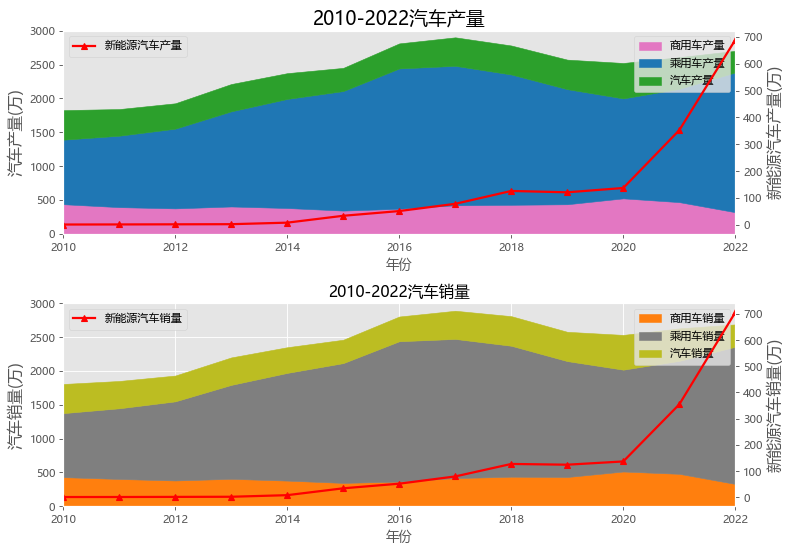

In [71]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

#堆积面积图可以直观地显示多个时间序列的贡献程度，因此很容易相互比较。
fig1,axs = plt.subplots(2,1,figsize=(10,7),dpi= 80)
columns=sale_production_type.columns[1:]
sales=[]
products=[]
for column in columns[::2]:
    sales.append(column)
for column in columns[1::2]:
    products.append(column)
    

mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']

x = sale_production_type['年份'].values.tolist()[::-1]
ysales = [sale_production_type[y].values.tolist()[::-1] for y in sales]

axs[0].fill_between(x,ysales[2],y2=0,label=sales[2],color=mycolors[-2])
axs[0].fill_between(x,ysales[1],y2=ysales[2],label=sales[1],color=mycolors[1])
axs[0].fill_between(x,ysales[0],y2=ysales[1],label=sales[0],color=mycolors[2])
axs[0].legend(loc='best')
axs[0].set_title('2010-2022汽车产量',fontsize=17)
axs[0].set_xlim(x[0], x[-1])
axs[0].set_ylim(0,3000)
axs[0].set_xlabel('年份')
axs[0].set_ylabel('汽车产量(万)',fontsize=14)
axs[0].grid(None)
ax=axs[0].twinx()
ax.plot(x,new_production,label="新能源汽车产量",color="red",linewidth=2,marker='^')
ax.set_ylabel('新能源汽车产量(万)',fontsize=14)
ax.legend(loc='best')
plt.tight_layout()
plt.grid(False)

yproduction=[sale_production_type[y].values.tolist()[::-1] for y in products]

axs[1].fill_between(x,y1=yproduction[2],y2=0,label=products[2],color=mycolors[3])
axs[1].fill_between(x,y1=yproduction[1],y2=yproduction[2],label=products[1],color=mycolors[5])
axs[1].fill_between(x,y1=yproduction[0],y2=yproduction[1],label=products[0],color=mycolors[-1])
axs[1].legend(loc='best')
axs[1].set_title('2010-2022汽车销量',fontsize=14)
axs[1].set_xlim(x[0], x[-1])
axs[1].set_ylim(0,3000)

axs[1].set_xlabel('年份')
axs[1].set_ylabel('汽车销量(万)',fontsize=14)

ax2=axs[1].twinx()
ax2.plot(x,new_sale,label="新能源汽车销量",color="red",linewidth=2,marker='^')
ax2.set_ylabel('新能源汽车销量(万)',fontsize=14)
ax2.legend(loc='best')
plt.tight_layout()
plt.grid(False)

plt.savefig('sale_production_type.png')
plt.show()

### 从充电桩数量看发展

In [72]:
charge = pd.read_excel(r'data/2016-2022公共充电桩（直流、交流、交直流一体）数量.xlsx',skiprows=1,nrows=8)
charge

,年份,公共类充电桩数量（万）,直流充电桩（万）,交流充电桩（万）,交直流一体充电桩（万）,数据来源,Unnamed: 6
0,2016,14.1,3.8,5.3,5.030,中国充电联盟,
1,2017,21.4,6.1,8.6,6.600,中国充电联盟,
2,2018,30.0,11.0,19.0,0.050,中国充电联盟,
3,2019,51.6,21.5,30.1,0.049,中国充电联盟,
4,2020,80.7,30.9,49.8,0.048,中国充电联盟,
5,2021,114.7,47.0,67.7,0.059,中国充电联盟,
6,2022,179.7,76.1,103.6,0.000,中国充电联盟,


In [82]:
labels=charge.columns.values.tolist()[2:-2]
year = charge['年份'].values.tolist()
labels

['直流充电桩（万）', '交流充电桩（万）', '交直流一体充电桩（万）']

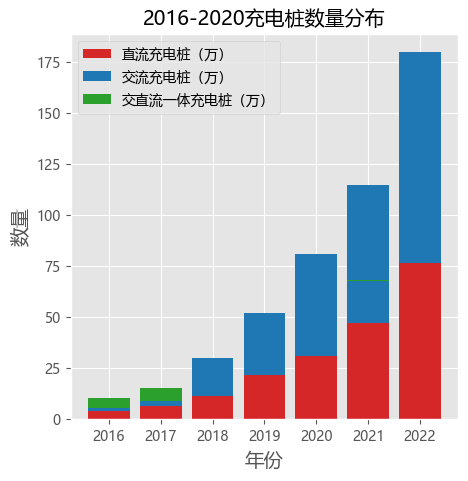

In [74]:
plt.style.use('ggplot')
plt.figure(figsize=(5,5))
ycharge=[]
for i in labels:
    ycharge.append(charge[i].values.tolist())
plt.bar(year,ycharge[0],label=labels[0],color=mycolors[0])
plt.bar(year,ycharge[1],label=labels[1],color=mycolors[1],bottom=ycharge[0])
plt.bar(year,ycharge[2],label=labels[2],color=mycolors[2],bottom=ycharge[1])
plt.legend()
plt.ylabel("数量",fontsize=14)
plt.xlabel("年份",fontsize=14)
plt.title("2016-2020充电桩数量分布")
plt.savefig('charge_year.png')
plt.show()

In [75]:
pattern = pd.read_excel(r'data/pattern/21汽车上市公司专利数量-发明专利（年，1999-2022，68家）.xls',skiprows=6,header=None)
pattern

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,2022-12-31,2.0,15.0,114.0,3.0,2.0,1.0,88.0,2.0,18.0,...,NaN,6.0,395.0,1.0,126.0,2027.0,13.0,3.0,6.0,NaN
1,2021-12-31,1.0,22.0,201.0,1.0,1.0,15.0,125.0,5.0,48.0,...,4.0,5.0,792.0,1.0,131.0,694.0,7.0,12.0,15.0,5.0
2,2020-12-31,4.0,32.0,104.0,4.0,1.0,8.0,105.0,9.0,30.0,...,1.0,6.0,636.0,1.0,302.0,320.0,8.0,3.0,20.0,1.0
3,2019-12-31,11.0,5.0,7.0,NaN,2.0,5.0,73.0,4.0,22.0,...,1.0,19.0,678.0,6.0,486.0,409.0,5.0,3.0,33.0,NaN
4,2018-12-31,9.0,2.0,5.0,2.0,5.0,6.0,46.0,4.0,11.0,...,NaN,6.0,966.0,1.0,155.0,331.0,13.0,4.0,23.0,1.0
5,2017-12-31,8.0,5.0,5.0,NaN,4.0,NaN,22.0,4.0,8.0,...,4.0,2.0,1279.0,3.0,17.0,254.0,15.0,2.0,10.0,1.0
6,2016-12-31,9.0,NaN,1.0,NaN,6.0,1.0,16.0,2.0,9.0,...,NaN,NaN,448.0,NaN,93.0,293.0,8.0,10.0,2.0,1.0
7,2015-12-31,9.0,1.0,10.0,NaN,4.0,7.0,16.0,5.0,5.0,...,NaN,3.0,798.0,2.0,126.0,272.0,5.0,3.0,5.0,4.0
8,2014-12-31,5.0,7.0,39.0,NaN,4.0,14.0,8.0,NaN,13.0,...,NaN,NaN,509.0,3.0,56.0,423.0,4.0,6.0,NaN,1.0
9,2013-12-31,13.0,1.0,30.0,NaN,NaN,3.0,6.0,3.0,2.0,...,NaN,1.0,265.0,2.0,28.0,143.0,NaN,NaN,NaN,1.0


In [76]:
#求各家公司专利数平均数、最大值
df2 = pd.DataFrame()
df2['mean_num']=pattern.iloc[:,1:].mean(axis=1,skipna=True)
df2['max_num']=pattern.iloc[:,1:].max(axis=1,skipna=True)
df2['min_num']=pattern.iloc[:,1:].min(axis=1, skipna=True)
df2['median']=pattern.iloc[:,1:].median(axis=1,skipna=True)
df2

,mean_num,max_num,min_num,median
0,131.349206,2027.0,1.0,9.0
1,107.727273,1546.0,1.0,15.0
2,92.312500,1161.0,1.0,8.5
3,96.406780,1649.0,1.0,13.0
4,67.562500,966.0,1.0,9.0
5,74.300000,1279.0,1.0,10.0
6,49.089286,546.0,1.0,7.5
7,68.454545,977.0,1.0,9.0
8,52.851852,509.0,1.0,7.0
9,39.618182,546.0,1.0,6.0


[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

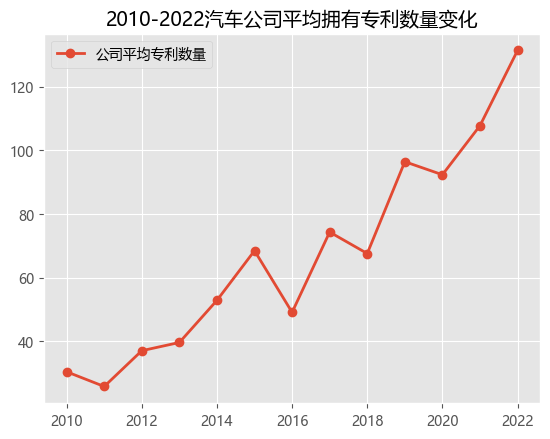

In [112]:
plt.figure()
plt.style.use('ggplot')
year = pattern[0].dt.year.values.tolist()
num = df2['mean_num'].values.tolist()
plt.plot(year[0:13],num[0:13],label='公司平均专利数量',linewidth=2,marker='o')
plt.legend()
plt.title("2010-2022汽车公司平均拥有专利数量变化",fontsize=14)

plt.savefig('pattern.png')
plt.title("2010-2022汽车公司平均拥有专利数量变化",fontsize=14)


# 评价体系
销量、充电桩数量、公司平均专利数量

In [78]:
print("销量数据中nan数量: ",sale_production_type.isna().sum().sum())
print("专利数据中nan数量: ",pattern.isna().sum().sum())
print("充电桩数据中nan数量: ",charge.isna().sum().sum())

销量数据中nan数量:  0
专利数据中nan数量:  704
充电桩数据中nan数量:  0


In [79]:
sale_proportion = []
for (i,j) in list(zip(new_sale,ysales[0][::-1])):
    print(i,j)
    sale_proportion.append(i/j)
sale_proportion

0.72 2702.1
0.84 2608.2
1.26 2522.5
1.75 2572.1
7.85 2780.92
34.05 2901.5
51.7 2811.9
79.4 2450.33
127.05 2372.29
124.2 2211.68
136.6 1927.18
354.5 1841.89
705.8 1826.47


[0.0002664594204507605,
 0.00032206119162640903,
 0.0004995044598612488,
 0.0006803779013257649,
 0.002822806840901572,
 0.011735309322764087,
 0.018386144599736833,
 0.03240379867201561,
 0.05355584688212655,
 0.056156405990016645,
 0.07088076879170602,
 0.19246534809353436,
 0.3864284658384753]

In [96]:
chargenum=[0,0,0,0,0,0]+charge['公共类充电桩数量（万）'].values.tolist()
print(chargenum)

[0, 0, 0, 0, 0, 0, 14.1, 21.4, 30.0, 51.6, 80.7, 114.7, 179.7]


In [115]:
from sklearn.preprocessing import StandardScaler

# 原始数据
data1 = sale_proportion
data2 = chargenum
data3 = num[12::-1]


scaler = StandardScaler()

scaled_data1 = scaler.fit_transform([[x] for x in data1])
scaled_data2 = scaler.fit_transform([[x] for x in data2])
scaled_data3 = scaler.fit_transform([[x] for x in data3])

print("Scaled Data 1:", scaled_data1)
print("Scaled Data 2:", scaled_data2)
print("Scaled Data 3:", scaled_data3)

Scaled Data 1: [[-0.59668435]
 [-0.59616039]
 [-0.59448824]
 [-0.59278377]
 [-0.57259448]
 [-0.48860704]
 [-0.42593255]
 [-0.29383645]
 [-0.09450902]
 [-0.07000251]
 [ 0.06875329]
 [ 1.21451195]
 [ 3.04233355]]
Scaled Data 2: [[-0.70452511]
 [-0.70452511]
 [-0.70452511]
 [-0.70452511]
 [-0.70452511]
 [-0.70452511]
 [-0.4421532 ]
 [-0.30631527]
 [-0.14628701]
 [ 0.25564442]
 [ 0.79713538]
 [ 1.42980523]
 [ 2.63932111]]
Scaled Data 3: [[-1.18147298]
 [-1.33010126]
 [-0.96852602]
 [-0.88550243]
 [-0.45983595]
 [ 0.04203115]
 [-0.58086045]
 [ 0.23005262]
 [ 0.01333814]
 [ 0.94112635]
 [ 0.80943215]
 [ 1.3052547 ]
 [ 2.06506399]]


In [129]:
score=[]
for (i1,i2,i3) in zip(scaled_data1,scaled_data2,scaled_data3):
    score.append((i1[0]+i2[0]+i3[0])/3)
print(score)

[-0.8275608143531027, -0.8769289202492021, -0.7558464581542997, -0.7276037708641883, -0.5789851801729058, -0.38370033360129474, -0.48298206769610746, -0.12336636501963998, -0.07581929472226816, 0.37558942067216017, 0.5584402741791482, 1.3165239592728115, 2.58223955070889]


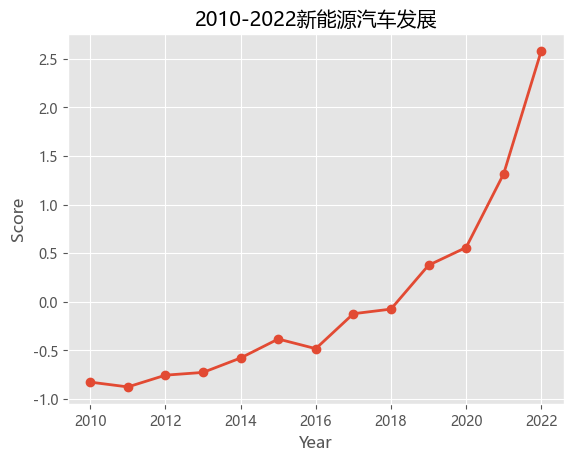

In [130]:
plt.plot(year[12::-1],score,linewidth=2,marker='o')
plt.title('2010-2022新能源汽车发展')
plt.xlabel('Year')
plt.ylabel('Score')
plt.savefig('progressscore.png')